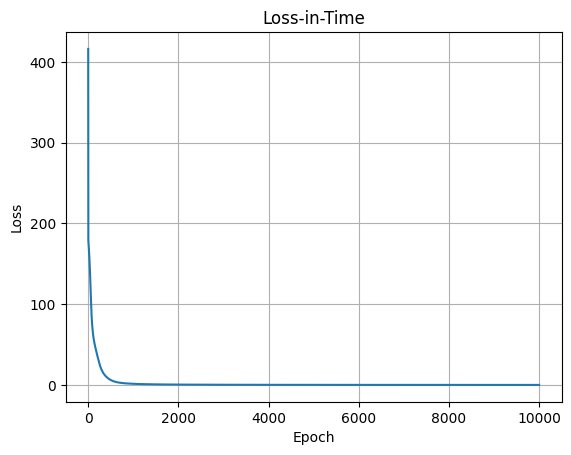

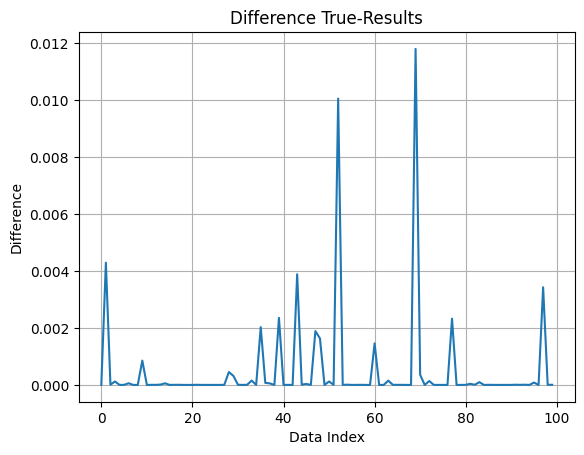

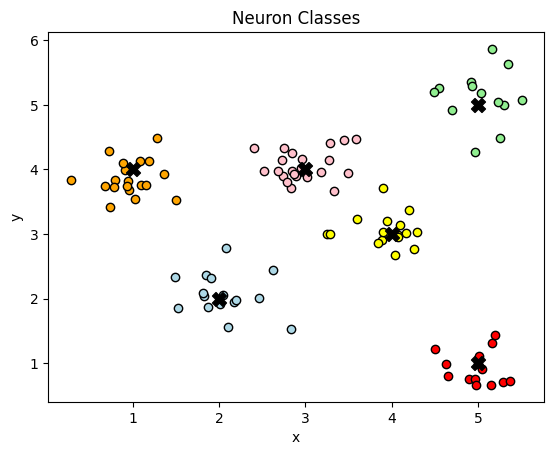

In [3]:
# import packages
import sys
import os
import math
import random
import matplotlib.pyplot as plt

# get path for Neuron
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("Centroids_2D.ipynb"))))
sys.path.insert(0, parent_dir)

# Neuron import
import Neuron


# ------------------------------------------- GENERATE THE DATASET FROM CENTROIDS ------------------------------------------

def generate_from_centroids(centroids: list[list[float]], points_number = 100, classes_number = 5):
    dataset = []

    # create the dataset
    for _ in range(points_number):
        index = random.randint(0, classes_number - 1)
        x = centroids[index][0] + random.gauss(0, 0.3)
        y = centroids[index][1] + random.gauss(0, 0.3)
        res = [0.0] * classes_number
        res[index] = 1
        dataset.append(([x, y], res))
   
    # return the dataset
    return dataset


# ------------------------------------------------ TRAIN THE NEURAL NETWORK ------------------------------------------------

# train the Neuron
centroids = [
    [2,2],
    [5,1],
    [1,4],
    [3,4],
    [5,5],
    [4,3]
]
classes = len(centroids)
data = generate_from_centroids(centroids, classes_number = classes)

# train the Neuron
activation = "relu"
layer_list = []
layer_list.append(Neuron.Layer(5, 2, activation = activation))
layer_list.append(Neuron.Layer(5, 5, activation = activation))
layer_list.append(Neuron.Layer(classes, 5, activation = activation))
nr = Neuron.Network(layer_list, loss_correction = "crossentropy", output_activation = "softmax")
loss = nr.train(data, 10000)

# plot the Loss-in-Time
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss-in-Time")
plt.grid(True)
plt.show()

# get after-train results
result = []
diff = []
for input, target in data:
    new_res = nr.forward(input)
    result.append(new_res.index(max(new_res)))
    diff.append(1 - new_res[target.index(1)])


# plot the Difference True-Results
plt.plot(diff)
plt.xlabel("Data Index")
plt.ylabel("Difference")
plt.title("Difference True-Results")
plt.grid(True)
plt.show()


# ---------------------------------------------------- PLOT THE CLASSES ----------------------------------------------------

# Plot the original Data-Set classified
colors = ["lightblue", "red", "orange", "pink", "lightgreen", "yellow"]
for i in range(len(data)):
    x = data[i][0]
    plt.scatter(x[0], x[1], color=colors[result[i]], edgecolor='k')
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], s = 100, marker = 'X', color = "black", edgecolor='k')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Neuron Classes")
plt.show()